<a href="https://colab.research.google.com/github/Travistyse/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
import pandas as pd
wine_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'



In [41]:
df = pd.read_csv(wine_data_url, header=None)
df.head()

,0
0,"fixed acidity;""volatile acidity"";""citric acid""..."
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...


In [42]:
df[0]

0       fixed acidity;"volatile acidity";"citric acid"...
1        7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2        7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3       7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4       11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
                              ...                        
1595    6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1596    5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1597    6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1598    5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...
1599    6;0.31;0.47;3.6;0.067;18;42;0.99549;3.39;0.66;...
Name: 0, Length: 1600, dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 1 columns):
0    1600 non-null object
dtypes: object(1)
memory usage: 12.6+ KB


In [44]:
df[0][0]

'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [0]:
column_headers = ["fixed acidity","volatile acidity","citric acid",
"residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide",
"density","pH","sulphates","alcohol","quality"]

In [46]:
df.head(5)

,0
0,"fixed acidity;""volatile acidity"";""citric acid""..."
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...


In [47]:
column_headers = ["fixed acidity","volatile acidity","citric acid",
"residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide",
"density","pH","sulphates","alcohol","quality"]
df = pd.read_csv(wine_data_url, header=None, names=column_headers)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,"fixed acidity;""volatile acidity"";""citric acid""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.drop(0,0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = pd.read_csv(wine_data_url, header=None, sep = ';', names=column_headers)

In [64]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [65]:
df.drop(index = 0) # You can see rows x columns below

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [66]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [67]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
unique,97,144,81,92,154,61,145,437,90,97,66,7
top,7.2,0.6,0,2,0.08,6,28,0.9972,3.3,0.6,9.5,5
freq,67,47,132,156,66,138,43,36,57,69,139,681


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

#df = pd.read_csv('/content/winequality-red.csv', header=None, sep = ';')
# I actually fixed mine in Notepad++ by using replace
df = pd.read_csv('winequality-red.csv', header=None, names=column_headers)

In [87]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
#df.drop(index=0) #This also shows the first and last 5 rows, eat it, .tail()
#Just kidding, turns out that those being dropped STILL causes major issues later
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [89]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [90]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0            

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


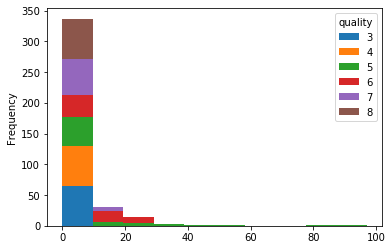

In [91]:
# Your Code Here
pd.crosstab(df['alcohol'], df['quality']).plot(kind='hist', stacked='true');

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

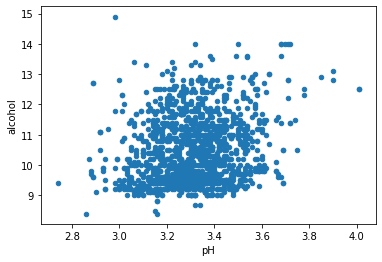

In [94]:
# Your Code Here
df.plot.scatter('pH','alcohol')

In [93]:
df.info() #None of these ~are~ were numbers apparently
# Fixed this by deleting the entire "names" row from the source file instead 
# Of doing it via drop()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [83]:
#df_num = df.astype(float)

ValueError: ignored

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


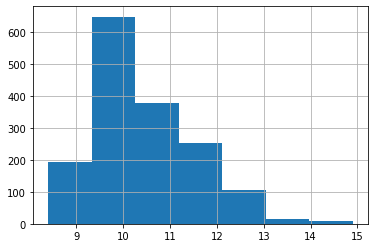

In [100]:
print(df['alcohol'].describe())
df['alcohol'].hist(bins=7);

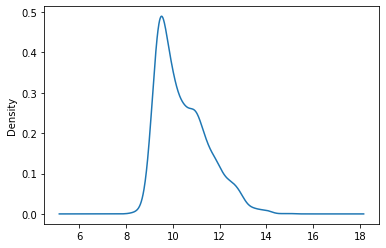

In [101]:
df['alcohol'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [102]:
# Your Code Here
# My bad, doing this a little out of order!
# And also, this data isn't very fun. I can't think of many ways to engage
# With it. I chose wine because I thought "oh dang, so many properties"
# I was imagining wine type, sales, popularity / rankings, age of person rating,
# And so on and so forth. Grapes, time fermenting.. Instead I got diddly.
# Apparently next assignment I need to add "See if interesting" to my data
# inspection list ;m;
pd.crosstab(df['quality'], df['alcohol'])

alcohol,8.400000,8.500000,8.700000,8.800000,9.000000,9.050000,9.100000,9.200000,9.233333,9.250000,9.300000,9.400000,9.500000,9.550000,9.566667,9.600000,9.700000,9.800000,9.900000,9.950000,10.000000,10.033333,10.100000,10.200000,10.300000,10.400000,10.500000,10.550000,10.600000,10.700000,10.750000,10.800000,10.900000,11.000000,11.066667,11.100000,11.200000,11.300000,11.400000,11.500000,11.600000,11.700000,11.800000,11.900000,11.950000,12.000000,12.100000,12.200000,12.300000,12.400000,12.500000,12.600000,12.700000,12.800000,12.900000,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.566667,13.600000,14.000000,14.900000
quality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,2,3,0,0,2,2,0,0,0,6,2,3,1,0,4,0,1,0,1,3,1,0,0,0,0,0,3,4,0,1,3,1,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,1,0,2,11,0,14,50,0,0,44,79,97,1,0,38,35,49,25,0,29,0,23,21,13,12,31,0,8,7,0,9,13,19,0,7,8,5,9,3,1,1,2,1,1,1,1,1,0,0,0,1,0,1,2,4,0,0,0,0,0,0,0,0,1
6,1,0,2,0,16,0,7,17,1,1,13,22,40,1,1,15,14,23,18,0,25,2,21,20,18,25,25,1,14,18,1,22,27,22,1,15,15,18,18,19,8,9,15,14,0,10,4,7,5,7,11,2,6,8,3,0,0,1,2,1,1,0,1,4,0
7,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,2,1,4,0,8,0,2,4,1,1,10,1,6,1,0,11,5,11,0,4,10,7,2,6,6,11,10,5,0,9,8,4,7,6,9,2,2,7,3,2,0,0,1,1,0,1,3,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,2,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,2,0


## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.